In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

In [20]:
data_train_online = pd.DataFrame(pd.read_csv("./ccf_offline_stage1_train.csv",header = 0))

In [21]:
data_train_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
User_id          int64
Merchant_id      int64
Coupon_id        float64
Discount_rate    object
Distance         float64
Date_received    float64
Date             float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [22]:
data_train_online.Date.isnull().value_counts()

True     977900
False    776984
Name: Date, dtype: int64

In [23]:
data_train_online.Coupon_id.isnull().value_counts()

False    1053282
True      701602
Name: Coupon_id, dtype: int64

In [24]:
use_coupon = data_train_online[(data_train_online.Date.isnull().values == False)
                               & (data_train_online.Coupon_id.isnull().values == False)] #使用优惠券
use_coupon.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date
count,7.538200e+04,75382.000000,75382.000000,67165.000000,7.538200e+04,7.538200e+04
mean,3.702388e+06,4204.947534,7017.243161,1.014263,2.016038e+07,2.016041e+07
std,2.121203e+06,2490.766404,4035.328484,2.300831,1.623936e+02,1.601844e+02
min,1.840000e+02,3.000000,1.000000,0.000000,2.016010e+07,2.016010e+07
25%,1.868933e+06,2099.000000,3642.000000,0.000000,2.016022e+07,2.016023e+07
50%,3.692509e+06,3939.000000,7113.000000,0.000000,2.016041e+07,2.016042e+07
75%,5.548070e+06,6485.000000,10637.000000,1.000000,2.016052e+07,2.016053e+07
max,7.360941e+06,8856.000000,14045.000000,10.000000,2.016062e+07,2.016063e+07


In [25]:
not_use_coupon = data_train_online[(data_train_online.Date.isnull().values == True)
                               & (data_train_online.Coupon_id.isnull().values == False)] #领取未使用
not_use_coupon.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date
count,9.779000e+05,977900.000000,977900.000000,880114.000000,9.779000e+05,0.0
mean,3.686074e+06,3933.984938,6799.838824,3.397797,2.016031e+07,NaN
std,2.125241e+06,2416.452054,4184.393129,3.859439,1.772566e+02,NaN
min,4.000000e+00,2.000000,1.000000,0.000000,2.016010e+07,NaN
25%,1.840574e+06,1637.750000,2840.000000,0.000000,2.016013e+07,NaN
50%,3.692300e+06,3381.000000,7430.000000,2.000000,2.016031e+07,NaN
75%,5.527965e+06,6284.000000,10119.000000,6.000000,2.016051e+07,NaN
max,7.361032e+06,8856.000000,14045.000000,10.000000,2.016062e+07,NaN


In [26]:
not_have_coupon = data_train_online[(data_train_online.Date.isnull().values == False)
                               & (data_train_online.Coupon_id.isnull().values == True)]
not_have_coupon.describe() #未领取优惠券但购买了
not_have_coupon.count()

User_id          701602
Merchant_id      701602
Coupon_id             0
Discount_rate         0
Distance         701602
Date_received         0
Date             701602
dtype: int64

In [27]:
data_train_online.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN
8,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN
9,2029232,450,1532.0,30:5,0.0,20160530.0,NaN


In [28]:
#添加列coupon_use，表示是否用券
data_train_online['coupon_use'] = data_train_online['Date'].notnull()&data_train_online['Coupon_id'].notnull()
data_train_online['coupon_use'] = data_train_online[['coupon_use']].astype(int)
#print(data_train_online['coupon_use'])

In [29]:
gb = data_train_online.groupby('User_id')

cols  = ['User_id','Merchant_id']
# 对data_train_online按照当前的User_id特征列进行分组，统计个数

#该用户共有几条记录
count=gb.size().reset_index(drop=False)
count.rename(columns={0:'total_count'}, inplace = True)
#print(count)
data_train_online=data_train_online.merge(count,how='left',on='User_id')

#该用户共领了几张券
count_m=gb['Coupon_id'].count().reset_index(drop=False)
count_m.rename(columns={'Coupon_id':'coupon_count'}, inplace = True)
print(count_m)
data_train_online=data_train_online.merge(count_m,how='left',on='User_id')

#该用户共购买几次
count_m=gb['Date'].count().reset_index(drop=False)
count_m.rename(columns={'Date':'buy_count'}, inplace = True)
print(count_m)
data_train_online=data_train_online.merge(count_m,how='left',on='User_id')



#print(data_train_online)

        User_id  coupon_count
0             4             2
1            35             4
2            36             2
3            64             1
4           110             3
5           144             1
6           147             1
7           165             3
8           166             1
9           173             1
10          184             2
11          209             0
12          215             1
13          228             1
14          236             4
15          238             2
16          239             2
17          285             1
18          311             2
19          315             2
20          316             1
21          318             1
22          327             3
23          338             1
24          353             1
25          358             1
26          377             2
27          387             1
28          417             5
29          430             1
...         ...           ...
539408  7360602             5
539409  73

In [30]:
#该用户共用券购买了几次
count_m=gb['coupon_use'].sum().reset_index(drop=False)
count_m.rename(columns={'coupon_use':'use_count'}, inplace = True)
#print(count_m)
data_train_online=data_train_online.merge(count_m,how='left',on='User_id')

In [31]:
gb = data_train_online.groupby('User_id')
#未领取优惠券但购买了
data_train_online['coupon_not_use'] = data_train_online['Date'].notnull()&data_train_online['Coupon_id'].isnull()
data_train_online['coupon_not_use'] = data_train_online[['coupon_not_use']].astype(int)
#print(data_train_online['coupon_not_use'])

#该用户未领取优惠券但购买的次数
count_m=gb['coupon_not_use'].sum().reset_index(drop=False)
count_m.rename(columns={'coupon_not_use':'coupon_not_use_count'}, inplace = True)
#print(count_m)
data_train_online=data_train_online.merge(count_m,how='left',on='User_id')

#领取优惠券但未购买
data_train_online['not_buy'] = data_train_online['Date'].isnull()&data_train_online['Coupon_id'].notnull()
data_train_online['not_buy'] = data_train_online[['not_buy']].astype(int)
#print(data_train_online['not_buy'])
gb = data_train_online.groupby('User_id')
#该用户领取优惠券但未购买的次数
count_m=gb['not_buy'].sum().reset_index(drop=False)
count_m.rename(columns={'not_buy':'not_buy_count'}, inplace = True)
#print(count_m)
data_train_online=data_train_online.merge(count_m,how='left',on='User_id')

In [128]:
#用户领取后的核销率
data_train_online['use_rate'] = data_train_online['use_count']/data_train_online['coupon_count']
data_train_online['use_rate'] = data_train_online['use_rate'].replace(np.nan, 0)
cols = ['use_count','coupon_count','use_rate']
print(data_train_online[cols].head(200))

     use_count  coupon_count  use_rate
0            1             5     0.200
1            1             5     0.200
2            1             5     0.200
3            1             5     0.200
4            1             5     0.200
5            1             5     0.200
6            1             5     0.200
7            0             1     0.000
8            0             3     0.000
9            0             3     0.000
10           0             3     0.000
11           0             3     0.000
12           0             3     0.000
13           0             1     0.000
14           0             1     0.000
15           0             1     0.000
16           0             1     0.000
17           0             1     0.000
18           0             1     0.000
19           0             1     0.000
20           0             1     0.000
21           0             2     0.000
22           0             2     0.000
23           0             2     0.000
24           0           

In [35]:
#得到券的折扣率，无券为0
data_train_online['Discount_rate_num'] =data_train_online['Discount_rate'].isnull().apply(lambda x: 0 if x else 1)
x = []
for i,j in zip(data_train_online['Discount_rate_num'], data_train_online['Discount_rate']):
    #print(i,j)
    if i == 0:
        x.append(0)
    else:
        a = j.split(':')
        a = list(map(float, a))
        if len(a) < 2:
            x.append(a[0])
        else:
            x.append(a[1]/a[0])
    
    
data_train_online['Discount_rate_num'] = x
#print(data_train_online['Discount_rate_num'])

In [36]:
data_train_online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754884 entries, 0 to 1754883
Data columns (total 17 columns):
User_id                 int64
Merchant_id             int64
Coupon_id               float64
Discount_rate           object
Distance                float64
Date_received           float64
Date                    float64
coupon_use              int64
total_count             int64
coupon_count            int64
buy_count               int64
use_count               int64
coupon_not_use          int64
coupon_not_use_count    int64
not_buy                 int64
not_buy_count           int64
Discount_rate_num       float64
dtypes: float64(5), int64(11), object(1)
memory usage: 241.0+ MB


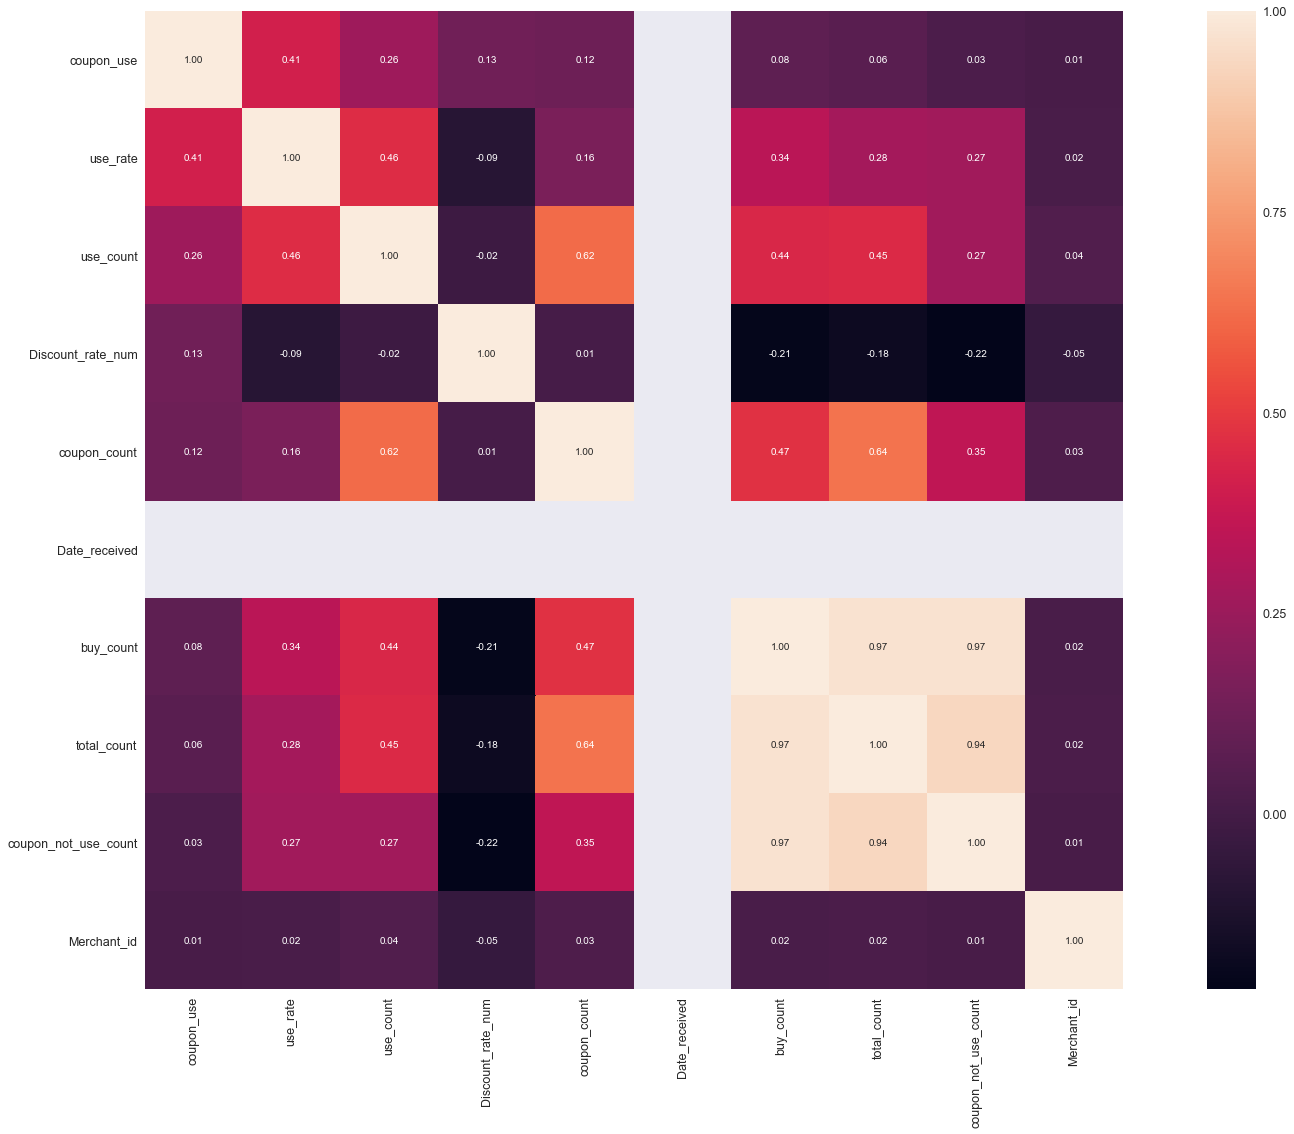

In [129]:
corrmat = data_train_online.corr()
f, ax = plt.subplots(figsize=(30, 18))
#sns.heatmap(corrmat, vmax=0.8, square=True,annot = True)

k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'coupon_use')['coupon_use'].index
cm = np.corrcoef(data_train_online[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [37]:
import xgboost as xgb

train_cols = ['total_count','coupon_count','buy_count','use_count','coupon_not_use_count','not_buy_count','Discount_rate_num','Distance']
# 构造训练、测试集
X_train=data_train_online[train_cols]
Y_train=data_train_online.loc[:,'coupon_use'].values

reg_model=xgb.XGBRegressor(max_depth=8, # 构建树的深度，越大越容易过拟合
                           n_estimators=3880, # 最佳迭代次数
                           learning_rate=0.1, # 学习率
                           n_jobs=-1) # 启动cpu所有核
reg_model.fit(X_train, # 训练集
              Y_train, # 训练集标签
              eval_set=[(X_train,Y_train)], # 验证集
              verbose = 10, # 训练多少轮打印一次结果
              early_stopping_rounds=10 # 每经过10轮rmse必须下降，否则停止训练
             )



[0]	validation_0-rmse:0.453633
Will train until validation_0-rmse hasn't improved in 10 rounds.
[10]	validation_0-rmse:0.199886
[20]	validation_0-rmse:0.139769
[30]	validation_0-rmse:0.129996
[40]	validation_0-rmse:0.128367
[50]	validation_0-rmse:0.127828
[60]	validation_0-rmse:0.127588
[70]	validation_0-rmse:0.127398
[80]	validation_0-rmse:0.127237
[90]	validation_0-rmse:0.127102
[100]	validation_0-rmse:0.126965
[110]	validation_0-rmse:0.126822
[120]	validation_0-rmse:0.126723
[130]	validation_0-rmse:0.126615
[140]	validation_0-rmse:0.126442
[150]	validation_0-rmse:0.126304
[160]	validation_0-rmse:0.126214
[170]	validation_0-rmse:0.126127
[180]	validation_0-rmse:0.126041
[190]	validation_0-rmse:0.12598
[200]	validation_0-rmse:0.125852
[210]	validation_0-rmse:0.125775
[220]	validation_0-rmse:0.125708
[230]	validation_0-rmse:0.125583
[240]	validation_0-rmse:0.12549
[250]	validation_0-rmse:0.125411
[260]	validation_0-rmse:0.125292
[270]	validation_0-rmse:0.125195
[280]	validation_0-rmse:

[2440]	validation_0-rmse:0.11873
[2450]	validation_0-rmse:0.118721
[2460]	validation_0-rmse:0.118708
[2470]	validation_0-rmse:0.118691
[2480]	validation_0-rmse:0.118671
[2490]	validation_0-rmse:0.118652
[2500]	validation_0-rmse:0.11864
[2510]	validation_0-rmse:0.118635
[2520]	validation_0-rmse:0.11862
[2530]	validation_0-rmse:0.11861
[2540]	validation_0-rmse:0.118599
[2550]	validation_0-rmse:0.118584
[2560]	validation_0-rmse:0.118567
[2570]	validation_0-rmse:0.118554
[2580]	validation_0-rmse:0.118546
[2590]	validation_0-rmse:0.118533
[2600]	validation_0-rmse:0.118514
[2610]	validation_0-rmse:0.118499
[2620]	validation_0-rmse:0.118487
[2630]	validation_0-rmse:0.118477
[2640]	validation_0-rmse:0.118466
[2650]	validation_0-rmse:0.118456
[2660]	validation_0-rmse:0.11845
[2670]	validation_0-rmse:0.118437
[2680]	validation_0-rmse:0.118426
[2690]	validation_0-rmse:0.118418
[2700]	validation_0-rmse:0.11841
[2710]	validation_0-rmse:0.118397
[2720]	validation_0-rmse:0.118385
[2730]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=3880,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [102]:
#读取测试文件
data_test = pd.DataFrame(pd.read_csv("./ccf_offline_stage1_test_revised.csv",header = 0))
data_test.duplicated().value_counts()

False    112803
True        837
dtype: int64

In [103]:
#得到券的折扣率，无券为0
data_test['Discount_rate_num'] =data_test['Discount_rate'].isnull().apply(lambda x: 0 if x else 1)
x = []
for i,j in zip(data_test['Discount_rate_num'], data_test['Discount_rate']):
    #print(i,j)
    if i == 0:
        x.append(0)
    else:
        a = j.split(':')
        a = list(map(float, a))
        if len(a) < 2:
            x.append(a[0])
        else:
            x.append(a[1]/a[0])
    
    
data_test['Discount_rate_num'] = x
#data_test
#print(data_test['Discount_rate_num'])

In [104]:
#用户信息合并列
cols = ['User_id','total_count','coupon_count','buy_count','use_count','coupon_not_use_count','not_buy_count']
user_train_merge = data_train_online[cols]
user_train_merge = user_train_merge.drop_duplicates()

#合并
data_test_merge = pd.merge(data_test,user_train_merge,on='User_id',how='left')

In [105]:
#data_test_merge

In [106]:
y_pred=reg_model.predict(data_test_merge[train_cols])

In [117]:
data_test['Probability'] = y_pred
data_test['Probability'] = data_test['Probability'].apply(lambda x: x if x >= 0.0 else 0.0 )
data_test['Probability'] = data_test['Probability'].apply(lambda x: x if x <= 1.0 else 1.0 )
data_test['Probability'].max()

1.0

In [118]:
data_test.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount_rate_num,Probability
0,4129537,450,9983,30:5,1.0,20160712,0.166667,0.000022
1,6949378,1300,3429,30:5,NaN,20160706,0.166667,0.991565
2,2166529,7113,6928,200:20,5.0,20160727,0.100000,0.000023
3,2166529,7113,1808,100:10,5.0,20160727,0.100000,0.000023
4,6172162,7605,6500,30:1,2.0,20160708,0.033333,0.012951


In [119]:
res_cols = ['User_id', 'Coupon_id', 'Date_received', 'Probability']
data_test[res_cols].to_csv('./res_1.csv',index=False,header = 0)

In [131]:
data_train_online.to_csv('./feature_1.csv', index = False)